In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
file_path = r"C:\Users\ndon2\Downloads\Module 4 assignment\Car_sales.csv"
df = pd.read_csv(file_path)
df.head()



,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [10]:
features = [
    "Sales_in_thousands", "Price_in_thousands", "Engine_size", "Horsepower",
    "Wheelbase", "Width", "Length", "Curb_weight", "Fuel_capacity",
    "Fuel_efficiency", "Power_perf_factor"
]

X = df[features]
imputer = SimpleImputer(strategy="mean")
X_clean = imputer.fit_transform(X)


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


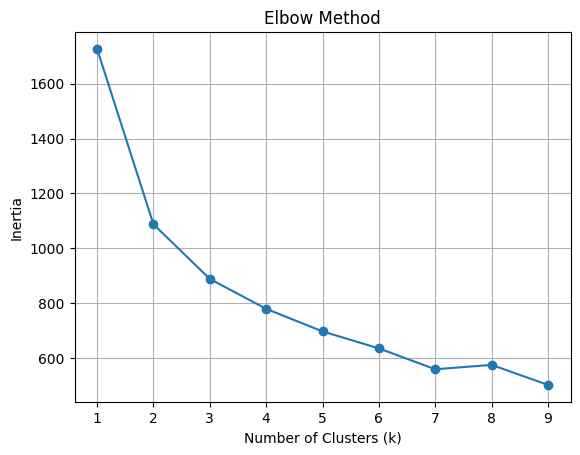

In [6]:
inertia = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()


In [7]:
model = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = model.fit_predict(X_scaled)


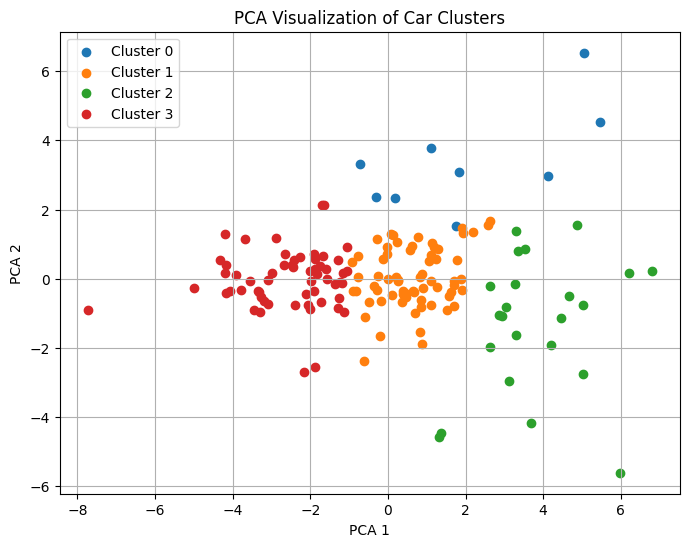

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(X_pca[df["Cluster"] == i, 0], X_pca[df["Cluster"] == i, 1], label=f"Cluster {i}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Visualization of Car Clusters")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
output_path = r"C:\Users\ndon2\Downloads\Module 4 assignment\clustered_car_sales.csv"
df.to_csv(output_path, index=False)
